In [1]:
# Exercise 1: Prime number check

def is_prime(n):
    if n <= 1:
        return False
    for i in range(2, int(n**0.5)+1):
        if n % i == 0:
            return False
    return True

print("Is 7 prime?", is_prime(7))
print("Is 10 prime?", is_prime(10))


Is 7 prime? True
Is 10 prime? False


In [2]:
# Exercise 2: List comprehensions

divisible_by_3 = [n for n in range(1, 21) if n % 3 == 0]
print("Numbers divisible by 3 from 1 to 20:", divisible_by_3)


Numbers divisible by 3 from 1 to 20: [3, 6, 9, 12, 15, 18]


In [3]:
import pandas as pd

# Exercise 3: Load dataset (Iris from Kaggle or sklearn)

from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)
df = iris.frame

print("Head:")
print(df.head())
print("\nColumns:", df.columns.tolist())
print("\nData types:")
print(df.dtypes)


Head:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  

Columns: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'target']

Data types:
sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                 int64
dtype: object


Exercise 4

In [5]:
from google.colab import files
uploaded = files.upload()

Saving BostonHousing.csv to BostonHousing.csv
Saving Titanic.csv to Titanic.csv


Saving BostonHousing.csv to BostonHousing (2).csv
Head:


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2



Columns: ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat', 'medv']

Dtypes:
crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
b          float64
lstat      float64
medv       float64
dtype: object

Column analyzed: rm
Mean: 6.28434131736527
Median: 6.208
Standard deviation: 0.7055867751520439


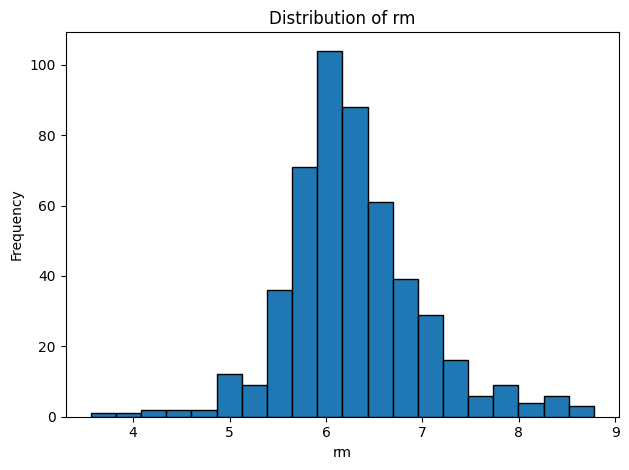

In [8]:
# Exercise 4: Basic Data Analysis (Boston Housing)

import pandas as pd
import matplotlib.pyplot as plt

# 1) Upload BostonHousing.csv from your computer (run this cell and pick the file)
from google.colab import files
uploaded = files.upload()  # choose BostonHousing.csv

# 2) Load the CSV (adjust the exact filename if needed)
# If the uploaded file has a different exact name, replace it below
df_bos = pd.read_csv("BostonHousing.csv")

print("Head:")
display(df_bos.head())

print("\nColumns:", df_bos.columns.tolist())
print("\nDtypes:")
print(df_bos.dtypes)

# 3) Choose a numeric column (case-insensitive candidates)
# Common Kaggle/Boston columns (yours are lowercase)
candidates = ["rm", "lstat", "medv", "price"]
cols_lower = {c.lower(): c for c in df_bos.columns}
qcol = next((cols_lower[c] for c in candidates if c in cols_lower), None)

if qcol is None:
    raise ValueError(f"No known column found among: {candidates}. Please choose an existing column from: {df_bos.columns.tolist()}")

# 4) Coerce to numeric in case the column is read as string
series = pd.to_numeric(df_bos[qcol], errors="coerce").dropna()

# 5) Compute mean, median, std
mean_val = series.mean()
median_val = series.median()
std_val = series.std()

print(f"\nColumn analyzed: {qcol}")
print("Mean:", mean_val)
print("Median:", median_val)
print("Standard deviation:", std_val)

# 6) Optional: plot a simple histogram
plt.figure()
plt.hist(series, bins=20, edgecolor="black")
plt.title(f"Distribution of {qcol}")
plt.xlabel(qcol)
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


In [9]:
# Exercise 5: Titanic dataset transformation (Sex -> numeric)
# Comments in English

import pandas as pd

# 1) Upload Titanic.csv
from google.colab import files
uploaded = files.upload()  # choose Titanic.csv

# 2) Load CSV (adjust the exact name if needed)
df_tit = pd.read_csv("Titanic.csv")

print("Head:")
display(df_tit.head())

# 3) Find the 'Sex' column case-insensitively
sex_col = next((c for c in df_tit.columns if c.lower() == "sex"), None)
if sex_col is None:
    raise ValueError("No 'Sex' column found. Please check your Titanic CSV headers.")

# 4) Normalize strings and map to 0/1
df_tit["Sex_num"] = (
    df_tit[sex_col]
    .astype(str)
    .str.strip()
    .str.lower()
    .map({"female": 0, "male": 1})
    .astype("Int64")  # nullable integer dtype
)

print("\nValue counts (mapped):")
print(df_tit["Sex_num"].value_counts(dropna=False))

# Show a small sample
display(df_tit[[sex_col, "Sex_num"]].head(10))

# 5) (Optional) Save and download the transformed CSV
out_name = "Titanic_mapped.csv"
df_tit.to_csv(out_name, index=False)
from google.colab import files
files.download(out_name)


Saving Titanic.csv to Titanic (1).csv
Head:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S



Value counts (mapped):
Sex_num
1    266
0    152
Name: count, dtype: Int64


,Sex,Sex_num
0,male,1
1,female,0
2,male,1
3,male,1
4,female,0
5,male,1
6,female,0
7,male,1
8,female,0
9,male,1


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>